In [3]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [18]:
# Read the csv file
df = pd.read_csv("AcademicPerformance.csv")

In [20]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,NaN
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [21]:
df.shape

(1000, 8)

In [22]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [27]:
# Count missing (NaN) values in each column
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [30]:
# List columns with missing (NaN) values
cols_with_na = []
for col in df.columns:
    if df[col].isna().any():
        cols_with_na.append(col)

cols_with_na

[]

In [31]:
# Handle missing values and outliers for columns with NaN values
for col in cols_with_na:
    col_dt = df[col].dtypes
    if (col_dt == 'int64' or col_dt == 'float64'):  # For numeric columns
        # Replace outliers (values < 0 or > 100) with NaN
        outliers = (df[col] < 0) | (df[col] > 100)
        df.loc[outliers, col] = np.nan
        # Fill NaN with the mean of the column
        df[col] = df[col].fillna(df[col].mean())
    else:  # For non-numeric columns
        # Fill NaN with forward fill method
        df[col] = df[col].fillna(method='ffill')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.00000
1,female,group C,some college,standard,completed,69.0,90.0,88.00000
2,female,group B,master's degree,standard,none,90.0,95.0,93.00000
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,67.99598
4,male,group C,some college,standard,none,76.0,78.0,75.00000
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.00000
996,male,group C,high school,free/reduced,none,62.0,55.0,55.00000
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.00000
998,female,group D,some college,standard,completed,68.0,78.0,77.00000


In [32]:
# Calculate Total Marks by summing relevant columns
df['Total Marks'] = df['math score'] + df['reading score'] + df['writing score']

# Calculate Percentage
df['Percentage'] = df['Total Marks'] / 3  # Assuming 3 subjects

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Marks,Percentage
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.00000,218.00000,72.666667
1,female,group C,some college,standard,completed,69.0,90.0,88.00000,247.00000,82.333333
2,female,group B,master's degree,standard,none,90.0,95.0,93.00000,278.00000,92.666667
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,67.99598,171.99598,57.331993
4,male,group C,some college,standard,none,76.0,78.0,75.00000,229.00000,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.00000,282.00000,94.000000
996,male,group C,high school,free/reduced,none,62.0,55.0,55.00000,172.00000,57.333333
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.00000,195.00000,65.000000
998,female,group D,some college,standard,completed,68.0,78.0,77.00000,223.00000,74.333333


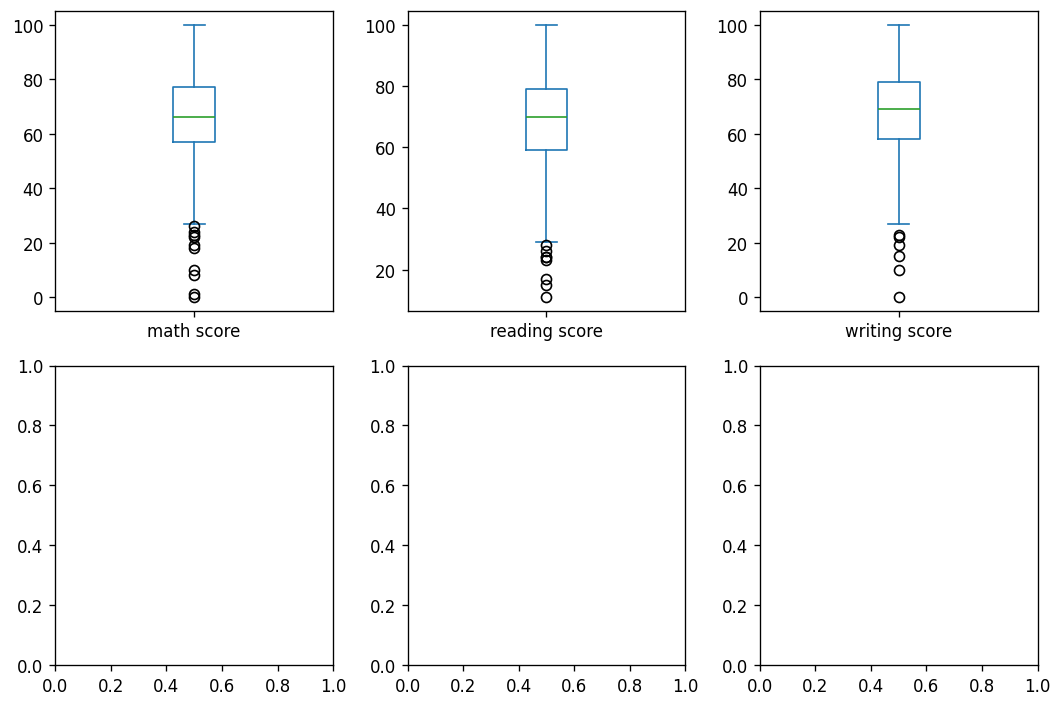

In [33]:
import matplotlib.pyplot as plt

# Set figure size and DPI
plt.rcParams["figure.figsize"] = (9, 6)
fig, axes = plt.subplots(2, 3)
fig.set_dpi(120)

# List of columns to plot
df_list = ['math score', 'reading score', 'writing score']

count = 0
for r in range(2):
    for c in range(3):
        if count < len(df_list):  # Ensure we don't exceed the length of df_list
            _ = df[df_list[count]].plot(kind='box', ax=axes[r, c])
            count += 1

plt.tight_layout()
plt.show()

In [36]:
# Calculate the IQR and outlier limits for the 'math score' column
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1

Lower_limit = Q1 - 1.5 * IQR
Upper_limit = Q3 + 1.5 * IQR

print(f'Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}, Lower_limit = {Lower_limit}, Upper_limit = {Upper_limit}')

Q1 = 57.0, Q3 = 77.0, IQR = 20.0, Lower_limit = 27.0, Upper_limit = 107.0


In [37]:
# Identifying the outliers in the 'math score' column
outliers = df[(df['math score'] < Lower_limit) | (df['math score'] > Upper_limit)]
outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Marks,Percentage
17,female,group B,some high school,free/reduced,none,18.0,32.0,28.0,78.0,26.000000
39,male,group B,associate's degree,free/reduced,none,10.0,56.0,57.0,123.0,41.000000
59,female,group C,some high school,free/reduced,none,0.0,17.0,10.0,27.0,9.000000
113,female,group D,some college,standard,none,1.0,58.0,54.0,113.0,37.666667
145,female,group C,some college,free/reduced,none,22.0,39.0,33.0,94.0,31.333333
338,female,group B,some high school,free/reduced,none,24.0,38.0,27.0,89.0,29.666667
466,female,group D,associate's degree,free/reduced,none,26.0,31.0,38.0,95.0,31.666667
787,female,group B,some college,standard,none,19.0,38.0,32.0,89.0,29.666667
842,female,group B,high school,free/reduced,completed,23.0,44.0,36.0,103.0,34.333333
980,female,group B,high school,free/reduced,none,8.0,24.0,23.0,55.0,18.333333


In [38]:
def BinningFunction(column, cut_points, labels=None):
    # Create the breakpoints by adding the minimum and maximum values to the cut points
    break_points = [column.min()] + cut_points + [column.max()]
    
    # Optional printout of the grading scheme
    print('Grading According to percentage:\n>60 = F\n60-70 = B\n70-80 = A\n80-100 = O')
    
    # Apply the binning function
    return pd.cut(column, bins=break_points, labels=labels, include_lowest=True)

# Example usage with math score
labels = ['F', 'B', 'A', 'O']  # Labels based on your grading criteria
df['math_score_grade'] = BinningFunction(df['math score'], cut_points=[60, 70, 80], labels=labels)

# Check the result
df[['math score', 'math_score_grade']].head()

Grading According to percentage:
>60 = F
60-70 = B
70-80 = A
80-100 = O


,math score,math_score_grade
0,72.0,A
1,69.0,B
2,90.0,O
3,47.0,F
4,76.0,A


In [39]:
# Define cut points and labels for grading
cut_points = [60, 70, 80]
labels = ['F', 'B', 'A', 'O']

# Apply the BinningFunction to the 'Percentage' column
df['Grade'] = BinningFunction(df['Percentage'], cut_points, labels)

# Display the DataFrame with the new 'Grade' column
df

Grading According to percentage:
>60 = F
60-70 = B
70-80 = A
80-100 = O


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Marks,Percentage,math_score_grade,Grade
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.00000,218.00000,72.666667,A,A
1,female,group C,some college,standard,completed,69.0,90.0,88.00000,247.00000,82.333333,B,O
2,female,group B,master's degree,standard,none,90.0,95.0,93.00000,278.00000,92.666667,O,O
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,67.99598,171.99598,57.331993,F,F
4,male,group C,some college,standard,none,76.0,78.0,75.00000,229.00000,76.333333,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.00000,282.00000,94.000000,O,O
996,male,group C,high school,free/reduced,none,62.0,55.0,55.00000,172.00000,57.333333,B,F
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.00000,195.00000,65.000000,F,B
998,female,group D,some college,standard,completed,68.0,78.0,77.00000,223.00000,74.333333,B,A
